# DSC 540 Machine Learning Project
### DSC 540 - Spring 2023
### Group Members: Isabelle Choi & Anna-Lisa Vu

## Bank Churners Problem Statement

We decided to do a ML project which predicts whether a customer will leave their bank credit card service.  Amongst the variables used for prediction is:
* Age
* Salary
* Marital_Status
* Credit Card Limit
* Credit Card Category

Additional details on the problem statement (as copied from Kaggle):
"A manager at the bank is disturbed with more and more customers leaving their credit card services. They would really appreciate if one could predict for them who is gonna get churned so they can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction."  This dataset was gathered from Kaggle and can be access through this link: https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers.


In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Import the data and Create Dataframes

In [24]:
df = pd.read_csv('/Users/lisasaurus01/git/dsc540_ml_project/BankChurners.csv')
attrited_customers = df[df['Attrition_Flag'] == 'Attrited Customer']
existing_customers = df[df['Attrition_Flag'] == 'Existing Customer']

#drop un-used columns
df.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', axis=1, inplace=True)

df.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2', axis=1, inplace=True)

df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


## Data Exploration


In [5]:
print("The data set consists of "+str(df.shape[0])+" rows and "+str(df.shape[1])+" columns (features).")

The data set consists of 10127 rows and 23 columns (features).


In [6]:
print("The data types of all columns is below.")
df.dtypes

The data types of all columns is below.


CLIENTNUM                                                                                                                               int64
Attrition_Flag                                                                                                                         object
Customer_Age                                                                                                                            int64
Gender                                                                                                                                 object
Dependent_count                                                                                                                         int64
Education_Level                                                                                                                        object
Marital_Status                                                                                                                         object
Income

There are only categorical variables which include -
* Gender
* Education_Level
* Marital_Status
* Income_Category
* Card_Category

The rest is all continuous (either int or floats).


In [26]:
print("The general stats of all continuous features is below.")
df.describe()

The general stats of all continuous features is below.


,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [27]:
print("The breakdown of gender in the data set is below:")
df['Gender'].value_counts()

The breakdown of gender in the data set is below:


F    5358
M    4769
Name: Gender, dtype: int64

There are more females than males.

In [28]:
print("The breakdown of education in the data set is below:")
df['Education_Level'].value_counts()

The breakdown of education in the data set is below:


Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

Graduate level seems the highest level achieved.  We are assuming that "graduate" means education after college.  There is a noticeable amount of Unknown and Uneducated people in the data set as well.

In [29]:
print("The breakdown of marital status in the data set is below:")
df['Marital_Status'].value_counts()

The breakdown of marital status in the data set is below:


Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

In [30]:
print("The breakdown of income category in the data set is below:")
df['Income_Category'].value_counts()

The breakdown of income category in the data set is below:


Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [31]:
print("The breakdown of card category in the data set is below:")
df['Card_Category'].value_counts()

The breakdown of card category in the data set is below:


Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

### Target Variable - Attrition Flag
The target variable is "Attrition Flag".  A "churned" customer is considered as someone who is an "Attritted Customer".  Otherwise, the customer would be an "existing customer".

In [32]:
df['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [33]:
num_attrited_customers = len(attrited_customers)
num_existing_customers = len(existing_customers)
print("The percentage of attrited customers is: "+str((num_attrited_customers / num_existing_customers) * 100) + " percent.")

The percentage of attrited customers is: 19.141176470588235 percent.


We are dealing with an imbalanced dataset since there are only 19% of attrited customers in the set.

In [34]:
print("The general stats of all attrited customer data is below.")
attrited_customers.describe()

The general stats of all attrited customer data is below.


,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.627000e+03,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000
mean,7.352614e+08,46.659496,2.402581,36.178242,3.279656,2.693301,2.972342,8136.039459,672.822987,7463.216472,0.694277,3095.025814,44.933620,0.554386,0.162475,0.994909,0.005091
std,3.557725e+07,7.665652,1.275010,7.796548,1.577782,0.899623,1.090537,9095.334105,921.385582,9109.208129,0.214924,2308.227629,14.568429,0.226854,0.264458,0.004303,0.004303
min,7.080833e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.945910,0.000420
25%,7.123713e+08,41.000000,2.000000,32.000000,2.000000,2.000000,2.000000,2114.000000,0.000000,1587.000000,0.544500,1903.500000,37.000000,0.400000,0.000000,0.994300,0.002825
50%,7.165644e+08,47.000000,2.000000,36.000000,3.000000,3.000000,3.000000,4178.000000,0.000000,3488.000000,0.701000,2329.000000,43.000000,0.531000,0.000000,0.996310,0.003688
75%,7.683737e+08,52.000000,3.000000,40.000000,5.000000,3.000000,4.000000,9933.500000,1303.500000,9257.500000,0.856000,2772.000000,51.000000,0.692000,0.231000,0.997170,0.005700
max,8.282949e+08,68.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,1.492000,10583.000000,94.000000,2.500000,0.999000,0.999580,0.054090


In [37]:
print("The breakdown of gender for all attrited customers is below:")
attrited_customers['Gender'].value_counts()

The breakdown of gender for all attrited customers is below:


F    930
M    697
Name: Gender, dtype: int64

In [38]:
print("The breakdown of education level for all attrited customers is below:")
attrited_customers['Education_Level'].value_counts()

The breakdown of education level for all attrited customers is below:


Graduate         487
High School      306
Unknown          256
Uneducated       237
College          154
Doctorate         95
Post-Graduate     92
Name: Education_Level, dtype: int64

In [39]:
print("The breakdown of marital status for all attrited customers is below:")
attrited_customers['Marital_Status'].value_counts()

The breakdown of marital status for all attrited customers is below:


Married     709
Single      668
Unknown     129
Divorced    121
Name: Marital_Status, dtype: int64

In [40]:
print("The breakdown of income category in the data set is below:")
attrited_customers['Income_Category'].value_counts()

The breakdown of income category in the data set is below:


Less than $40K    612
$40K - $60K       271
$80K - $120K      242
$60K - $80K       189
Unknown           187
$120K +           126
Name: Income_Category, dtype: int64

In [41]:
print("The breakdown of card category in the data set is below:")
attrited_customers['Card_Category'].value_counts()

The breakdown of card category in the data set is below:


Blue        1519
Silver        82
Gold          21
Platinum       5
Name: Card_Category, dtype: int64

### Null Values

In [42]:
df.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

There appears to be no null values.

## Data Visualizations

In [43]:
### Breakdown of Categorical Attributes between Attrited and Existing Customers

#### Gender

<AxesSubplot:title={'center':'Gender by Attrition Flag'}, xlabel='Attrition_Flag,Gender'>

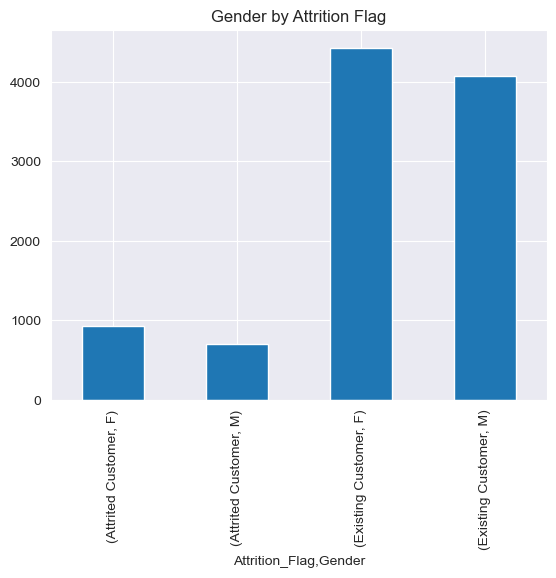

In [44]:
df_attrition_gender = df.groupby('Attrition_Flag')['Gender'].value_counts()

df_attrition_gender.plot.bar(x='Attrition_Flag', stacked=True, title='Gender by Attrition Flag')

Since there are more females than males in the data set, the results above are no surprise.

#### Education Level

<AxesSubplot:title={'center':'Education_Level - Attrited Customers'}, ylabel='Education_Level'>

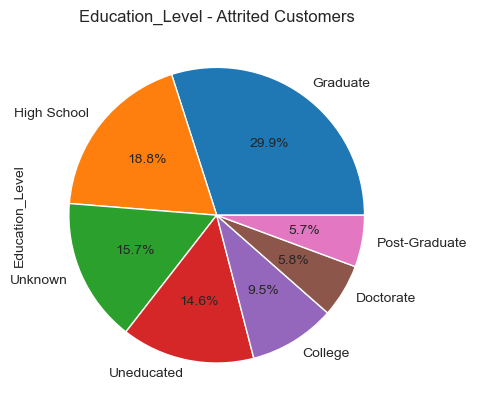

In [45]:
attrited_customers['Education_Level'].value_counts().plot(kind='pie', title='Education_Level - Attrited Customers', autopct='%1.1f%%')

<AxesSubplot:title={'center':'Education_Level - Existing Customers'}, ylabel='Education_Level'>

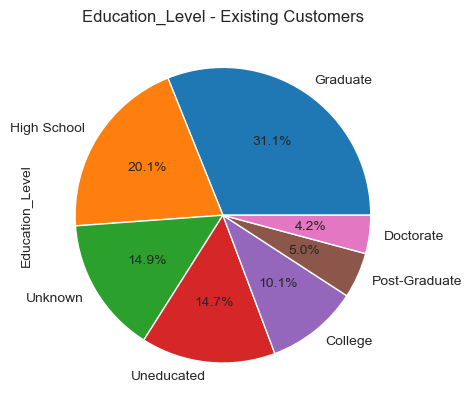

In [46]:
existing_customers['Education_Level'].value_counts().plot(kind='pie', title='Education_Level - Existing Customers', autopct='%1.1f%%')

In [47]:
#### Marital Status

<AxesSubplot:title={'center':'Marital Status - Attrited Customers'}, ylabel='Marital_Status'>

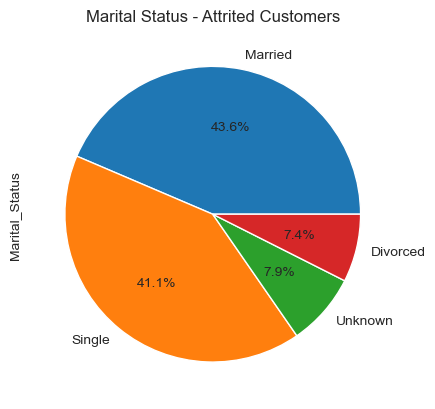

In [49]:
attrited_customers['Marital_Status'].value_counts().plot(kind='pie', title='Marital Status - Attrited Customers', autopct='%1.1f%%')

<AxesSubplot:title={'center':'Marital Status - Existing Customers'}, ylabel='Marital_Status'>

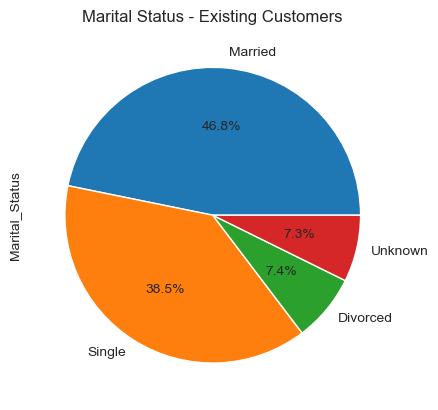

In [50]:
existing_customers['Marital_Status'].value_counts().plot(kind='pie', title='Marital Status - Existing Customers', autopct='%1.1f%%')

#### Income Category


<AxesSubplot:title={'center':'Income Category by Attrition Flag'}, xlabel='Attrition_Flag,Income_Category'>

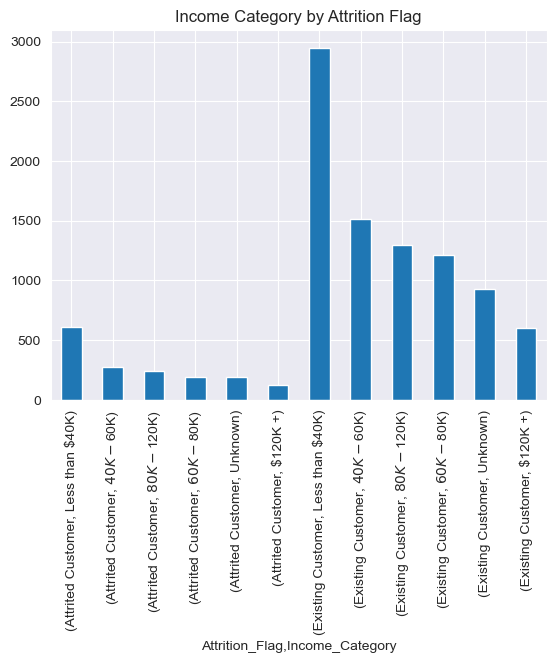

In [51]:
df_attrition_gender = df.groupby('Attrition_Flag')['Income_Category'].value_counts()

df_attrition_gender.plot.bar(x='Attrition_Flag', stacked=True, title='Income Category by Attrition Flag')

#### Card Category

<AxesSubplot:title={'center':'Card Category by Attrition Flag'}, xlabel='Attrition_Flag,Card_Category'>

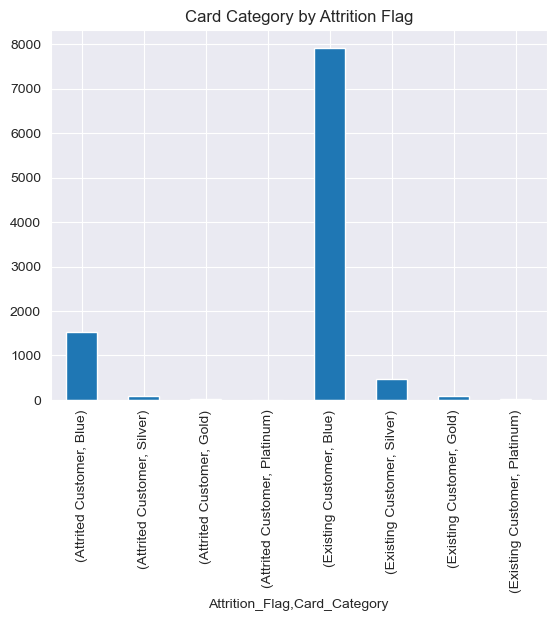

In [52]:
df_attrition_gender = df.groupby('Attrition_Flag')['Card_Category'].value_counts()

df_attrition_gender.plot.bar(x='Attrition_Flag', stacked=True, title='Card Category by Attrition Flag')

### Heat Map & Correlations

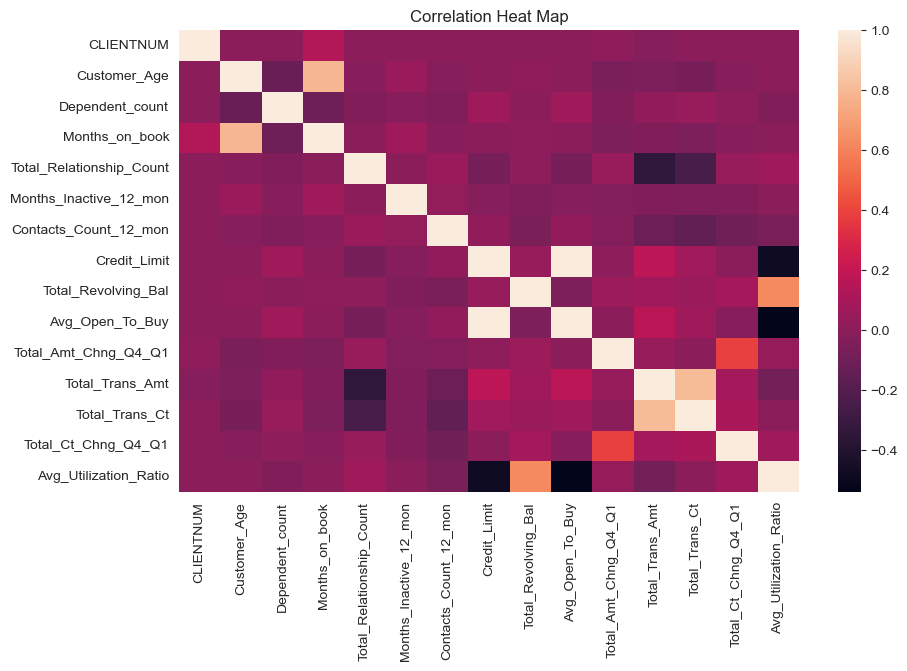

In [53]:
### Correlation Heat Map
#Correlation heat map
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr())
plt.title('Correlation Heat Map')
plt.show()

In [ ]:
df.corr()

Some higher correlations which are worth looking into:
* Total_Trans_Amt vs. Total_Trans_Ct - .807
* Credit_Limit vs. Avg_Open_To_Buy - .995
* Months_on_book vs. Customer_Age - .789

## Preparing the Train, Test, & Validation Data (Lisa to make sure to use Stratified sampling)

In [ ]:
## Data Cleaning & Pre-Processing

# from sklearn import preprocessing
# Scale the Data
ss = preprocessing.StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)


## Logistic Regression Classifier (Lisa)

## K-Nearest Neighbors (Isabelle)

## Random Forest Classifier (Isabelle)

## Gradient Boost (Lisa)

## Ada Boost (Lisa)

## Validation of the Models (Lisa)
